In [1]:
# 지금까지 
# constant , variables( 가중치 저장되는 공간 ) , placeholder( 데이터 주입)
# 가중치가 들어오는 데이터와 행렬연산을 통해 오차기반 학습을 했다 
# for 문을 이용해서 epoch 와 batchsize 를 돌렸다  ---> keras 에서는 for문 안쓰고, fit 함수를 이용해서 한번에 가능하다 (tensorflow 는 그 fit 내용을 이해하기 위해 배웠음)


In [2]:
# keras 
#keras 의 backend :  tensorflow, CNTK, Theano ( 즉 이런것등을 추가해서 묶은것이다 =  keras 는 왼쪽것들을 wrapper 시킨것이다. )
# keras 의 compile  (compile 은 loss, activation, optimizer 이런것을 말함. compile 아래에 저런것들이 있음 )
# keras 는 model 을 layer 방식으로 만들었다(=가중치 선언할필요가 없다), keras에서는 return 받는 과정이 생략된다 ( 점찍고 함수 호출하고 )
# layer 로 만들어졌기때문에 다른것들도 layer 로 구성되어있는데 Input, Dense, CNN, RNN 모두 layer 로 만들었다 (input dense 통과하면 회귀망)
# 즉 keras 는 출력 차수 값만 지정하면 된다 

# keras 에서 model 을 만드는 방법
# 1. sequential  ( 간단한 망, simple input, simple output) 
# 2. functional ( multi input, multi output ( ex. 한쪽은 이미지 한쪽은 텍스트를 받아서 RNN 망 학습시키면 이미지를 텍스트로 번역할수있다))
# 3. model  ( 상속을 받아서 하는 것으로 class base 로 프로그램을 하게 만들어줬다 )


# evaluate 하고 predict  ( evaluate 에는 test 데이터 넣어주고 predict 에는 실제 사용할 데이터 넣어주면 된다 ) 

#  keras 는 scikit 과 연결되어있는데 그래서 classifier 와 regressor 을 이용해서 ? 
# scikit 의 장점은 pipeline, gridsearchcv  
# 사이킷에 있는 gridsearchcv 를 이용해서 최적의 하이퍼파라미터를 정해질수 있게끔 해준다 (즉 keras 는 하이퍼파라미터 튜닝 기능 사용할 수 있다 )

In [3]:
# application  transform learning(처음부터 가중치를 학습시키는 것은 오래걸림)
# 즉 대표적인 분야에서 pre training 을 해둔다 ( pretrainging 하면 어느정도 가중치가 학습되어있다 ) 
# 가중치를 처음부터 학습하지 않고, -> 그니까 빨리 적합할수있다 

In [4]:
# GRU  ( LSTM 보다 속도 빠름 ) 
# GRU 에서 sequence2sequence 했음 

In [5]:
# NMT -> transformer -> BERT (transform 이용해서 양방향으로 작동하게 하는 망) 

In [6]:
# image , movie -> opencv
# sound  -> librosa
# text -> mltk, corpus

In [7]:
# 오늘 : 파라미터 튜닝, 기본구조

In [1]:
# 회귀 
from keras.models import Sequential  # sequential -> models 서브패키지 
from keras.layers import Dense       # layers 에서 모델 구성을 한다 ( Dense 등 ) 
from sklearn.datasets import make_regression

# 신경망에서는 정규화를 해야한다 
from sklearn.preprocessing import MinMaxScaler

X, y= make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1) # 샘플100개, feature2니까 100x2 ( -> y는 100개가 만들어짐 )

scalarX, scalarY = MinMaxScaler(), MinMaxScaler() # 민맥스 2개를 만든 이유는? 데이터 사이즈가 다르기 때문이다 .(값의 범위가 다르니까)
scalarX.fit(X)
scalarY.fit(y.reshape(100,1)) # 행으로
model = Sequential()
y = scalarY.transform(y.reshape(100,1))
# 여기서부터 keras model 시작 
model = Sequential() # sequential 모델 사용했다 
model.add(Dense(4, input_dim=2, activation='relu')) 
##>>  dense 가 출력차수만 지정하면 가중치를 알아서 만들어준다 ( 100x2 가 들어왔고 dense 가 출력 2x4 를 만들어준다 )
model.add(Dense(4,activation='relu')) # 두번째층의 입력망은 100x4 이다. 가중치는 4x4 이다. 출력차수는 100x4 가 됨 
model.add(Dense(1,activation='linear')) # 입력은 100x4, 가중치는 4x1  출력은 100x1 이다.(즉 100x1 로 예측이된다)  


# 모델을 만들어두고, compile 하는 것은 ? backend 가 tensorflow 이기 때문이다 (즉 tesnorflow 로 바꿔주는 것이 compile 이다 )
model.compile(loss='mse', optimizer='adam') # compile 은 tensorflow 로 모델을 변형하는 역할을 한다 
# >>> compile 쓰니까 간단하게 loss, optimizer 동시 사용 가능
#loss 함수 :  회귀일땐 mse, 분류일때는 enthropy, gan 에서는 KL-divergence(이건 분포를 비교해준다) 

# tesnorflow 에서는 이중 for 문을 썼었다 ( 위에 for 문은 epoch, 밑에 for문은 minibatch 였음) 근데 keras 에서는 아래처럼 간단
model.fit(X, y ,epochs=1000, verbose=0) # X 는 100x2,  출력차수는 2x4 이다.  


# 테스트 해보려고 새로운 샘플을 만들었다 
Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
Xnew = scalarX.transform(Xnew)
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
    print('입력데이터=%s, 예측결과=%s' % (Xnew[i], ynew[i]))
    
                          

Using TensorFlow backend.



입력데이터=[0.29466096 0.30317302], 예측결과=[0.5031222]
입력데이터=[0.39445118 0.79390858], 예측결과=[0.63287973]
입력데이터=[0.02884127 0.6208843 ], 예측결과=[0.5568099]


In [9]:
# keras 
# model에 add 해서 layer 를 추가하면 된다 (keras 가 알아서 layer 를 많이 만들어뒀음. 그 중에 많이 쓰는 것이 dense망 이다)
# dense 망은 FFNN 망을만들때 쓴다 

In [10]:
from keras.models import Sequential  # sequentialo : 입력도 1개, output 도 1개이다 
from keras.layers import Dense
import numpy
numpy.random.seed(7)
dataset = numpy.loadtxt('pima.data', delimiter=',') # 데이터 로드
X = dataset[:,0:8] # 독립변수 8개 
Y = dataset[:,8]  # 9번째있는 것이 종속변수이다 

model = Sequential()
# ? x8  8x12 -> ? x12 
model.add(Dense(12, input_dim=8, activation='relu'))
#?x12   12x8 -> ?x8
model.add(Dense(8, activation='relu'))  
# ?x8  8x1 --> ?x1  이 된다 

model.add(Dense(1, activation='sigmoid')) # 앞에서는 linear 가 왔다 (에측이 되는것 ) 여기선 sigmoid 가 왔다 ( 0.5 보다 크면 1 아니면 0이된다 0)
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy']) # compile 할때 주로, loss optimizer, metrics 쓴다 
model.fit(X,Y, epochs=150, batch_size=10) # epochs 와 batch_size 가 들어옴 

scores = model.evaluate(X,Y)
# print(model.metrics_names)
#->  2번째 accuracy 
print('\n%s: %.2f%%' %(model.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/150
768/768 [==============================] - 0s 423us/step - loss: 3.1751 - accuracy: 0.5820
Epoch 2/150
768/768 [==============================] - 0s 104us/step - loss: 0.9555 - accuracy: 0.5716
Epoch 3/150
768/768 [==============================] - 0s 87us/step - loss: 0.7622 - accuracy: 0.6302
Epoch 4/150
768/768 [==============================] - 0s 83us/step - loss: 0.7211 - accuracy: 0.6471
Epoch 5/150
768/768 [==============================] - 0s 88us/step - loss: 0.6940 - accuracy: 0.6745
Epoch 6/150
768/768 [==============================] - 0s 97us/step - loss: 0.6683 - accuracy: 0.6862
Epoch 7/150
768/768 [==============================] - 0s 100us/step - loss: 0.6626 - accuracy: 0.6745
Epoch 8/150
768/768 [==============================] - 0s 82us/step - loss: 0.6480 - accuracy: 0.6875
Epoch 9/150
768/768 [==============================] - 0s 73us/step - loss: 0.6347 - ac

In [11]:
# kernel_initalizer 사용 , return 을 사용했을때? 
from keras.models import Sequential 
from keras.layers import Dense
import numpy
numpy.random.seed(7)
dataset = numpy.loadtxt('pima.data', delimiter=',') 
X = dataset[:,0:8] 
Y = dataset[:,8] 

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', kernel_initializer='uniform')) 
# kernel_initializr 를 통해서 초기화방법 지정해줄수있다 >> 우리도 모르게 만들어지는 가중치를 균등분포로 초기화해주었다 
model.add(Dense(8, activation='relu'))  


model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])  

history = model.fit(X,Y, epochs=150,validation_split=0.33,  batch_size=10) # history 로 리턴받았다 --> 아래 참고 
     # 데이터를 분리할때  train 와 test 로 분리되는데 과적합 되는 현상이 벌어짐) 
     # -> train, validation, test 로 나눈다 ( 검증용 데이터인 validation 을 만드는 것 )
scores = model.evaluate(X,Y)

print('\n%s: %.2f%%' %(model.metrics_names[1], scores[1]*100))

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 637us/step - loss: 0.6906 - accuracy: 0.6576 - val_loss: 0.6552 - val_accuracy: 0.6693
Epoch 2/150
514/514 [==============================] - 0s 138us/step - loss: 0.6566 - accuracy: 0.6304 - val_loss: 0.6302 - val_accuracy: 0.6614
Epoch 3/150
514/514 [==============================] - 0s 124us/step - loss: 0.6427 - accuracy: 0.6304 - val_loss: 0.6347 - val_accuracy: 0.6614
Epoch 4/150
514/514 [==============================] - 0s 126us/step - loss: 0.6337 - accuracy: 0.6440 - val_loss: 0.6277 - val_accuracy: 0.6693
Epoch 5/150
514/514 [==============================] - 0s 116us/step - loss: 0.6257 - accuracy: 0.6654 - val_loss: 0.6228 - val_accuracy: 0.6654
Epoch 6/150
514/514 [==============================] - 0s 109us/step - loss: 0.6224 - accuracy: 0.6654 - val_loss: 0.6208 - val_accuracy: 0.6614
Epoch 7/150
514/514 [==============================] - 0s 103us/step - loss: 0.6116 

Epoch 57/150
514/514 [==============================] - 0s 122us/step - loss: 0.5685 - accuracy: 0.6868 - val_loss: 0.5760 - val_accuracy: 0.7008
Epoch 58/150
514/514 [==============================] - 0s 118us/step - loss: 0.5576 - accuracy: 0.6984 - val_loss: 0.5961 - val_accuracy: 0.6929
Epoch 59/150
514/514 [==============================] - 0s 116us/step - loss: 0.5702 - accuracy: 0.6907 - val_loss: 0.6194 - val_accuracy: 0.6457
Epoch 60/150
514/514 [==============================] - 0s 114us/step - loss: 0.5655 - accuracy: 0.6907 - val_loss: 0.5849 - val_accuracy: 0.6969
Epoch 61/150
514/514 [==============================] - 0s 111us/step - loss: 0.5664 - accuracy: 0.6829 - val_loss: 0.5803 - val_accuracy: 0.7047
Epoch 62/150
514/514 [==============================] - 0s 114us/step - loss: 0.5577 - accuracy: 0.6965 - val_loss: 0.5840 - val_accuracy: 0.7008
Epoch 63/150
514/514 [==============================] - 0s 103us/step - loss: 0.5533 - accuracy: 0.6926 - val_loss: 0.5778 -

514/514 [==============================] - 0s 115us/step - loss: 0.5452 - accuracy: 0.6946 - val_loss: 0.5969 - val_accuracy: 0.6890
Epoch 114/150
514/514 [==============================] - 0s 124us/step - loss: 0.5308 - accuracy: 0.7023 - val_loss: 0.5940 - val_accuracy: 0.7047
Epoch 115/150
514/514 [==============================] - 0s 122us/step - loss: 0.5407 - accuracy: 0.7004 - val_loss: 0.5813 - val_accuracy: 0.7087
Epoch 116/150
514/514 [==============================] - 0s 107us/step - loss: 0.5300 - accuracy: 0.7140 - val_loss: 0.6019 - val_accuracy: 0.7126
Epoch 117/150
514/514 [==============================] - 0s 107us/step - loss: 0.5464 - accuracy: 0.6926 - val_loss: 0.6099 - val_accuracy: 0.6969
Epoch 118/150
514/514 [==============================] - 0s 113us/step - loss: 0.5365 - accuracy: 0.7023 - val_loss: 0.5972 - val_accuracy: 0.7205
Epoch 119/150
514/514 [==============================] - 0s 101us/step - loss: 0.5572 - accuracy: 0.7043 - val_loss: 0.5921 - val_ac

In [12]:
print(history.history.keys()) # history 로 리턴받으면 -->> loss, accuracy 가 둘다 나온다. 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


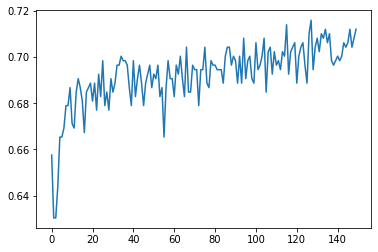

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


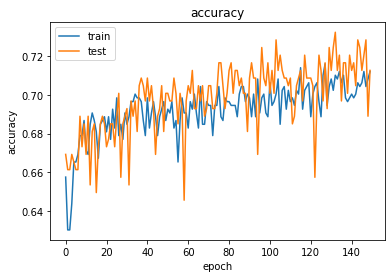

In [14]:
print(history.history.keys())
# val_loss, val_accuracy , loss, accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

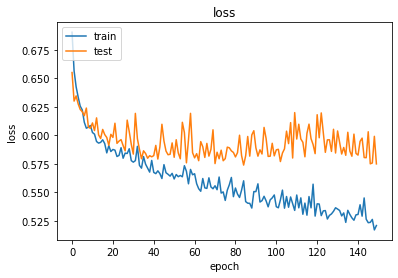

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, Y =make_moons(noise=0.2, random_state=0, n_samples=1000)  # X 는 1000x2
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

print(X.shape)  # X 는 1000x2 
print(Y.shape)

(1000, 2)
(1000,)


[Text(0, 0.5, 'Y'),
 Text(0.5, 0, 'X'),
 Text(0.5, 1.0, 'binary classification ')]

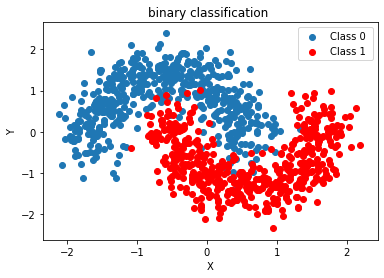

In [17]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0,0], X[Y==0,1], label='Class 0 ')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='binary classification ')

In [18]:
import keras

In [19]:
# 비선형모델일때 -> 신경망쓴다 
model = Sequential()
# 행렬연산 -> 설명을 확대 (변수32 - 설명) 
# 1000x2  2x32=64  + 32 = 96 ---> 1000x32 


model.add(Dense(32, input_dim=2, activation='relu')) # 여기에는 1000x32 가 들어오고 가중치는 32x1이 되고 결과는 1000x1 이 된다 (분류라는것)
                                                                                         # 32x1 = 33+bias1 =34 (즉 가중치가 있으면 bias 가 있다) 
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='AdaDelta', loss='binary_crossentropy', metrics=['accuracy'])
# callback 함수는 언제쓰냐?
# callback 함수는 window 에서 자동으로 호출되는 함수이다 
tb_callback = keras.callbacks.TensorBoard(log_dir = './Graph/model_1/',   # graph 이미지 출력 
                                         histogram_freq = 100, write_graph=True,
                                         write_images = False)

tb_callback.set_model(model) # 콜백을 모델에 등록해준다 (이미지를 간단하게 불러오는것을 콜백함수가 쓴것이라고 생각하자)
# 콜백함수를 모델에 등록하면 --> 모델이 훈련되면서 자동으로 위에 3문장을 호출해준다 (tb_callback = keras.callbacks.TensorBoard(log_dir = './Graph/model_1/',   # graph 이미지 출력 
                                                                               # histogram_freq = 100, write_graph=True,
                                                                               #  write_images = False)  --> 이걸 자동으로 호출해준다 
        


In [20]:
# 위에서 등록을 했고 fit 할때 호출을 한다 
hist = model.fit(X_train, Y_train, batch_size=32, epochs=200, verbose= 0, validation_data = (X_test, Y_test), callbacks=[tb_callback])

In [21]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test Loss: " , score[0])
print("Test accuracy:", score[1]) 

Test Loss:  0.12789358568191528
Test accuracy: 0.949999988079071


In [22]:
keras.utils.print_summary(model) # #print 하고 summary 하면 모델의 구성을 출력하낟 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


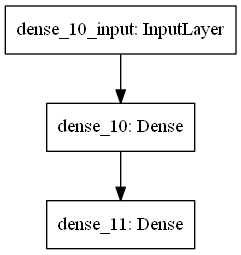

In [23]:
keras.utils.plot_model(model)  # 이건 모델의 구성!

In [24]:
%matplotlib inline
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

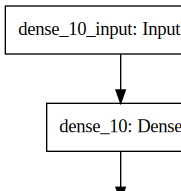

In [25]:
from IPython.display import Image, SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [26]:
from keras.datasets import mnist
import matplotlib.pylab as plt
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_train0.dtype)  # 60000,  28x28 이 나온다   -> 28x28이라고 안해도 된다 (내맘대로 조정한다)
print(y_train0.shape, y_train0.dtype)  # 60000
print(X_test0.shape, X_test0.dtype)   # 10000, 28x28
print(y_test0.shape, y_test0.dtype) # 

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


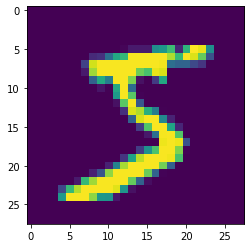

In [27]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()


In [28]:
# fully-connected : flatten : FFNN 은 

X_train = X_train0.reshape(60000,784).astype('float32')/255.0  # 255  로 나누는 이유 -> 이미지 정규화 (이미지는 원래 0~255사이의 값이므로 255로 나누니까 0~1 로 바뀐다=정규화) / 나누려면 float 형으로 바꾸어야한다. 
X_test = X_test0.reshape(10000,784).astype('float32')/255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [29]:

y_train0[:5] # 이걸확인해보면 one_hot_encoding 여부 확인가능  
# 5,0,4,1,9   로 나온다 -> onehotencoding 되어있지 않다   -> 해주어야한다 .

#( a만약 강아지고양이 이렇게 말고 3개가 넘어가면 softmax 해준다 )


array([5, 0, 4, 1, 9], dtype=uint8)

In [30]:
# categorical 함수를 이용해서 원핫인코딩한다
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [31]:
import numpy as np
from keras.optimizers import SGD
import numpy as np
np.random.seed(0)
model = Sequential()
# 60000x784 ,  784x 15  ---> 60000x15
model.add(Dense(15, input_dim=784, activation='sigmoid'))
# 60000x15   15x10   ->  60000x10 
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=['accuracy']) 
# learning rate(lr)
# stockhastic gradient descent : SGD : 확률적 경사하강법

In [32]:
# model.add(Dense(15, input_dim=784, activation='sigmoid')) 이것을 
# 출력차수가 512 인 레이어를 추가하고 싶을땐 
# model.add(Dense(512, input_dim=784, activation='sigmoid')) ; model.add(Dense(15)) 로 바꿔보자 

In [33]:
model.layers


In [34]:
l1 = model.layers[0]
l2 = model.layers[1]
# 레이어 속성으로 정보확인
l1.name
l1.input_shape
l1.output_shape
l1.activation

<function keras.activations.sigmoid(x)>

C:\Users\ICT01_10\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.1019 - accuracy: 0.2440 - val_loss: 0.0864 - val_accuracy: 0.3212
Epoch 2/30
 - 1s - loss: 0.0845 - accuracy: 0.3921 - val_loss: 0.0821 - val_accuracy: 0.4409
Epoch 3/30
 - 1s - loss: 0.0796 - accuracy: 0.4997 - val_loss: 0.0765 - val_accuracy: 0.5340
Epoch 4/30
 - 1s - loss: 0.0740 - accuracy: 0.5620 - val_loss: 0.0707 - val_accuracy: 0.5852
Epoch 5/30
 - 1s - loss: 0.0682 - accuracy: 0.6149 - val_loss: 0.0649 - val_accuracy: 0.6522
Epoch 6/30
 - 1s - loss: 0.0625 - accuracy: 0.6759 - val_loss: 0.0594 - val_accuracy: 0.6998
Epoch 7/30
 - 1s - loss: 0.0576 - accuracy: 0.7101 - val_loss: 0.0551 - val_accuracy: 0.7316
Epoch 8/30
 - 1s - loss: 0.0537 - accuracy: 0.7325 - val_loss: 0.0516 - val_accuracy: 0.7485
Epoch 9/30
 - 1s - loss: 0.0505 - accuracy: 0.7474 - val_loss: 0.0486 - val_accuracy: 0.7639
Epoch 10/30
 - 1s - loss: 0.0478 - accuracy: 0.7609 - val_loss: 0.0461 - val_accuracy: 0.7759
Epoch 11/30
 - 1s -

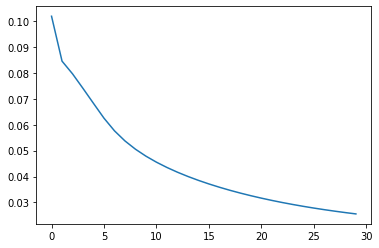

In [35]:
hist = model.fit(X_train, Y_train, nb_epoch=30, batch_size=100,
                validation_data = (X_test, Y_test), verbose=2) # validation data 를 저렇게 별도로 주어도된다 
plt.plot(hist.history['loss']) # 작업했던 내용을 확인할수있다. 
plt.show()

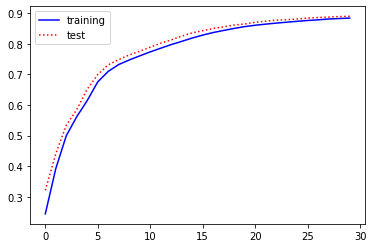

{'batch_size': 100, 'epochs': 30, 'steps': None, 'samples': 60000, 'verbose': 2, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0.24401666, 0.39213333, 0.49971667, 0.56201667, 0.6149167, 0.6759167, 0.7101333, 0.7325, 0.7474167, 0.76085, 0.77395, 0.7858833, 0.79766667, 0.8082833, 0.81918335, 0.82878333, 0.83713335, 0.84403336, 0.8506333, 0.85646665, 0.8609667, 0.8646167, 0.86795, 0.87091666, 0.87381667, 0.87651664, 0.8786833, 0.88136667, 0.8829, 0.8844]
0.8903999924659729


In [36]:
plt.plot(hist.history['accuracy'],'b-', label='training')
plt.plot(hist.history['val_accuracy'],'r:', label='test')
plt.legend()
plt.show()

print(hist.model)
print(hist.params)
print(hist.history['accuracy'])
print(hist.history['val_accuracy'][29])

In [37]:
# callback class
# callback 함수를 상속받으면 custom callback 함수를 제작할 수 있다
# >> keras 가 가지고있는 call back 기능은 함수에 의해서 호출되는 객체이다 

class CustomHistory(keras.callbacks.Callback): # () 안에 보이는것처럼 상속을 받는다. 
    def init(self):   #__init 랑 다른가??? (이해안됨)  
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self, batch,logs={}):  # 오버라이딩하고있다 (배치와 로고가 매개변수로 들어온다) 
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

In [38]:
custom_hist = CustomHistory()
custom_hist.init()  # init 를 호출하면 안되는데 어떻게 호출했나? 
hist = model.fit(X_train, Y_train, nb_epoch=30, batch_size=100, validation_data = (X_test,Y_test),
                 callbacks=[custom_hist], verbose=2)
                 
plt.plot(hist.history())

Train on 60000 samples, validate on 10000 samples
Epoch 1/30


C:\Users\ICT01_10\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


 - 1s - loss: 0.0251 - accuracy: 0.8863 - val_loss: 0.0241 - val_accuracy: 0.8911
Epoch 2/30
 - 1s - loss: 0.0246 - accuracy: 0.8873 - val_loss: 0.0236 - val_accuracy: 0.8929
Epoch 3/30
 - 1s - loss: 0.0242 - accuracy: 0.8886 - val_loss: 0.0232 - val_accuracy: 0.8946
Epoch 4/30
 - 1s - loss: 0.0238 - accuracy: 0.8897 - val_loss: 0.0229 - val_accuracy: 0.8956
Epoch 5/30
 - 1s - loss: 0.0234 - accuracy: 0.8910 - val_loss: 0.0225 - val_accuracy: 0.8963
Epoch 6/30
 - 1s - loss: 0.0231 - accuracy: 0.8920 - val_loss: 0.0222 - val_accuracy: 0.8976
Epoch 7/30
 - 1s - loss: 0.0228 - accuracy: 0.8928 - val_loss: 0.0219 - val_accuracy: 0.8985
Epoch 8/30
 - 1s - loss: 0.0225 - accuracy: 0.8935 - val_loss: 0.0216 - val_accuracy: 0.8997
Epoch 9/30
 - 1s - loss: 0.0222 - accuracy: 0.8945 - val_loss: 0.0213 - val_accuracy: 0.9002
Epoch 10/30
 - 1s - loss: 0.0219 - accuracy: 0.8956 - val_loss: 0.0210 - val_accuracy: 0.9012
Epoch 11/30
 - 1s - loss: 0.0216 - accuracy: 0.8962 - val_loss: 0.0208 - val_acc

TypeError: 'dict' object is not callable

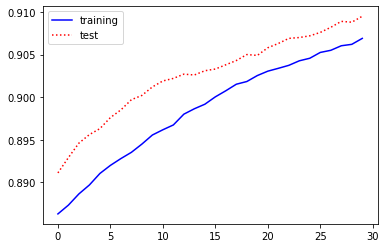

{'batch_size': 100, 'epochs': 30, 'steps': None, 'samples': 60000, 'verbose': 2, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0.88628334, 0.88731664, 0.8886333, 0.8896833, 0.89103335, 0.89198333, 0.89278334, 0.89351666, 0.8944833, 0.89555, 0.8961667, 0.89673334, 0.898, 0.89863336, 0.89916664, 0.90003335, 0.90075, 0.9015167, 0.90183336, 0.90253335, 0.90305, 0.9033833, 0.9037333, 0.90426666, 0.90456665, 0.90525, 0.9055, 0.90603334, 0.9062, 0.9069]
0.909500002861023


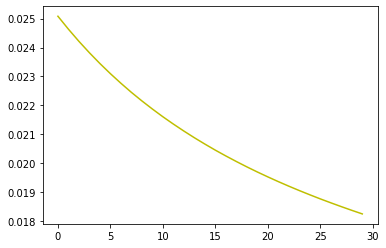

In [271]:
plt.plot(hist.history['accuracy'],'-b', label='training')
plt.plot(hist.history['val_accuracy'], 'r:', label='test')
plt.legend()
plt.show()

print(hist.model)
print(hist.params)
print(hist.history['accuracy'])
print(hist.history['val_accuracy'][29])
plt.show()
plt.plot(custom_hist.train_loss, 'y', label='train loss')
plt.show()

In [40]:
# 문제 : X_test 의 이미지 한장의 label 을 예측하라
model.predict(X_test[:1,:])

array([[0.00637829, 0.00547901, 0.00877038, 0.02193788, 0.00460088,
        0.03031099, 0.00612146, 0.9678394 , 0.00214405, 0.01650386]],
      dtype=float32)

In [41]:
model.predict_classes(X_test[:1,:],verbose=0)

array([7], dtype=int64)

In [42]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 7us/step


In [43]:
print(x_train.shape) # e다른것도 확인하기

(404, 13)


In [44]:
model = Sequential()
num_features=13
# 회귀만들기 -=> dense만 하나 쓰면된다.
model.add(Dense(1, input_dim=num_features, activation='linear'))

In [45]:
model.summary()
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1) # 회귀가 간단하게 된다

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
404/404 [==============================] - 0s 797us/step - loss: 34142.8877 - mae: 154.5619
Epoch 2/10
404/404 [==============================] - 0s 521us/step - loss: 1713.0123 - mae: 32.2951
Epoch 3/10
404/404 [==============================] - 0s 580us/step - loss: 506.9301 - mae: 17.5108
Epoch 4/10
404/404 [==============================] - 0s 548us/step - loss: 201.6745 - mae: 10.6537
Epoch 5/10
404/404 [==============================] - 0s 614us/step - loss: 160.3872 - mae: 9.6243
Epoch 6/10
404/404 [==============================] - 0s 568us/step - loss: 144.7382 - mae: 9.0129
Epoch 7/10
404/404 [==============================

In [46]:
# 아까는 accuracy 였는데 지금은 mae ??  (metrics 에 mae 지정했기때문)
mse, mae = model.evaluate(x_test, y_test, verbose=False)  
rmse = np.sqrt(mse)
mse, rmse,mae

(102.68482283049939, 10.133352003680686, 7.577787399291992)

In [47]:
# quiz : x_test 의 앞의 3집을 예측해보시오 

In [48]:
pred=model.predict(x_test[:3,:])
real = y_test[:3]

In [49]:
pred = pred.reshape(3,)

In [50]:
# 상관계수를 확인하라
import numpy as np
np.corrcoef(pred,real)

array([[1.        , 0.97028993],
       [0.97028993, 1.        ]])

In [268]:
# scitkits --keras를 연결 : KerasClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [269]:
# 768x9 => 768x8 => 독립변수, 768x1 종속변수
#  변수 8
def create_model():
    model = Sequential()
    # 8x12 => 768x12
    model.add(Dense(12, input_dim=8,activation='relu'))
    # 768x12 => 768x1
    model.add(Dense(1, activation='sigmoid')) # 0~1
    model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

seed=7
numpy.random.seed(seed)
dataset = np.loadtxt('pima.csv', delimiter=',')
print(dataset.shape)
X = dataset[:,0:8]
Y = dataset[:,8]
model = KerasClassifier(build_fn=create_model, verbose=0) # verbose : 설명을 달것인가 말것인다.0,1
print(X.shape)
print(Y.shape)

(768, 9)
(768, 8)
(768,)


In [270]:
# 파라미터 조합
batch_size = [10,20,40,60,80,100]
epochs=[10,50,100]
# 매개변수 입력형태는 dictionary
param_grid = dict(batch_size = batch_size, epochs = epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X,Y)
print('최적스코어: {} 사용한 파라미터조합 : '.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{:.5f} ({:.5f}) with : {}'.format(mean, stdev, param))

C:\Users\ICT01_10\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


최적스코어: 0.7135416666666666 사용한 파라미터조합 : 
0.59896 (0.05263) with : {'batch_size': 10, 'epochs': 10}
0.66016 (0.04072) with : {'batch_size': 10, 'epochs': 50}
0.71354 (0.00737) with : {'batch_size': 10, 'epochs': 100}
0.58854 (0.01757) with : {'batch_size': 20, 'epochs': 10}
0.67448 (0.02307) with : {'batch_size': 20, 'epochs': 50}
0.70833 (0.02415) with : {'batch_size': 20, 'epochs': 100}
0.57552 (0.06461) with : {'batch_size': 40, 'epochs': 10}
0.66276 (0.03513) with : {'batch_size': 40, 'epochs': 50}
0.67969 (0.02300) with : {'batch_size': 40, 'epochs': 100}
0.62760 (0.00921) with : {'batch_size': 60, 'epochs': 10}
0.65365 (0.04469) with : {'batch_size': 60, 'epochs': 50}
0.65234 (0.03880) with : {'batch_size': 60, 'epochs': 100}
0.56641 (0.07459) with : {'batch_size': 80, 'epochs': 10}
0.60026 (0.04965) with : {'batch_size': 80, 'epochs': 50}
0.67708 (0.02578) with : {'batch_size': 80, 'epochs': 100}
0.39844 (0.07224) with : {'batch_size': 100, 'epochs': 10}
0.62760 (0.04247) with : {

In [276]:
grid.best_params_

{'batch_size': 10, 'epochs': 100}

In [ ]:
# 가중치 초기화 매개변수를 넣고 (kernel_initializer)
# ['uniform ' , 'lecun_uniform', 'normal', 'zero',' glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

In [112]:
init_mode = ['uniform' , 'lecun_uniform', 'normal', 'zero','glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear']

In [113]:
# 768x9 => 768x8 => 독립변수, 768x1 종속변수
#  변수 8
def create_model(init_mode, activation):
    model = Sequential()
    # 8x12 => 768x12
    model.add(Dense(12, input_dim=8,activation=activation))
    # 768x12 => 768x1
    model.add(Dense(1,kernel_initializer=init_mode, activation='sigmoid')) # 0~1
    model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

seed=7
numpy.random.seed(seed)
dataset = np.loadtxt('pima.csv', delimiter=',')
print(dataset.shape)
X = dataset[:,0:8]
Y = dataset[:,8]
model = KerasClassifier(build_fn=create_model, verbose=0) # verbose : 설명을 달것인가 말것인다.0,1
print(X.shape)
print(Y.shape)

(768, 9)
(768, 8)
(768,)


In [114]:
# 파라미터 조합
batch_size = [10,20,40,60,80,100]
epochs=[10,50,100]

# 매개변수 입력형태는 dictionary
param_grid = dict(init_mode = init_mode, activation=activation)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X,Y)
print('최적스코어: {} 사용한 파라미터조합 : '.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{:.5f} ({:.5f}) with : {}'.format(mean, stdev, param))

최적스코어: 0.6549479166666666 사용한 파라미터조합 : 
0.65495 (0.02477) with : {'activation': 'softmax', 'init_mode': 'uniform'}
0.63932 (0.02963) with : {'activation': 'softmax', 'init_mode': 'lecun_uniform'}
0.65104 (0.02415) with : {'activation': 'softmax', 'init_mode': 'normal'}
0.65104 (0.02477) with : {'activation': 'softmax', 'init_mode': 'zero'}
0.52083 (0.13845) with : {'activation': 'softmax', 'init_mode': 'glorot_normal'}
0.45703 (0.14647) with : {'activation': 'softmax', 'init_mode': 'glorot_uniform'}
0.48958 (0.12113) with : {'activation': 'softmax', 'init_mode': 'he_normal'}
0.47005 (0.06616) with : {'activation': 'softmax', 'init_mode': 'he_uniform'}
0.50391 (0.11049) with : {'activation': 'softplus', 'init_mode': 'uniform'}
0.59245 (0.10967) with : {'activation': 'softplus', 'init_mode': 'lecun_uniform'}
0.44922 (0.11053) with : {'activation': 'softplus', 'init_mode': 'normal'}
0.65104 (0.02477) with : {'activation': 'softplus', 'init_mode': 'zero'}
0.48047 (0.11053) with : {'activat

In [125]:
# 과적합 방지
from keras.callbacks import EarlyStopping
stopper = EarlyStopping(monitor='val_acc', patience=3,verbose=1)


# 768x9 => 768x8 => 독립변수, 768x1 종속변수
#  변수 8
def create_model(init_mode, activation, dropout_rate):
    model = Sequential()
    # 8x12 => 768x12
    model.add(Dense(12, input_dim=8,activation=activation))
    
    model.add(Dropout(dropout_rate))
    # 768x12 => 768x1
    model.add(Dense(1,kernel_initializer=init_mode, activation='sigmoid')) # 0~1
    model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

dropout_rate = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
init_mode = ['uniform' , 'lecun_uniform', 'normal', 'zero','glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear']

seed=7
numpy.random.seed(seed)
dataset = np.loadtxt('pima.csv', delimiter=',')
print(dataset.shape)
X = dataset[:,0:8]
Y = dataset[:,8]
model = KerasClassifier(build_fn=create_model, verbose=0) # verbose : 설명을 달것인가 말것인다.0,1
print(X.shape)
print(Y.shape)

(768, 9)
(768, 8)
(768,)


In [126]:
# 파라미터 조합
batch_size = [10,20,40,60,80,100]
epochs=[10,50,100]

# 매개변수 입력형태는 dictionary
param_grid = dict(init_mode = init_mode, activation=activation, dropout_rate=dropout_rate)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
fit_params=dict(callbacks=[stopper])
# 변동매개변수
grid_result = grid.fit(X,Y, **fit_params)
print('최적스코어: {} 사용한 파라미터조합 : '.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{:.5f} ({:.5f}) with : {}'.format(mean, stdev, param))

최적스코어: 0.6783854166666666 사용한 파라미터조합 : 
0.59115 (0.07563) with : {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'uniform'}
0.51953 (0.06403) with : {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'lecun_uniform'}
0.61719 (0.05103) with : {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'normal'}
0.65104 (0.02477) with : {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'zero'}
0.47656 (0.10350) with : {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'glorot_normal'}
0.48568 (0.10248) with : {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'glorot_uniform'}
0.54036 (0.13995) with : {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'he_normal'}
0.41797 (0.10802) with : {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'he_uniform'}
0.65495 (0.02171) with : {'activation': 'softmax', 'dropout_rate': 0.1, 'init_mode': 'uniform'}
0.65234 (0.01940) with : {'activation': 'softmax', 'dropout_rate': 0.1, 'ini

In [ ]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
stopper = EarlyStopping(monitor='var_accuracy', patience=3, verbose=1)
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform',optimizer='relu',dropout_rate=0.1):
# create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation=optimizer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
# Earlystopping
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)
# define the grid search parameters
dropout_rate=[0.1,0.2,0.3] # ,0.4,0.5,0.6,0.7,0.8,0.9
init_mode = ['uniform', 'lecun_uniform']# ,'normal','zero','glorot_normal','glorot_uniform','he_normal','he_uniform'
optimizer = ['softmax','relu'] #, 'softplus', 'softsign','tanh','sigmoid','hard_sigmoid','linear'
param_grid = dict(init_mode=init_mode,optimizer=optimizer,dropout_rate=dropout_rate)
fit_params = dict(callbacks=[stopper])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# 변동 매개변수
grid_result = grid.fit(X, Y, **fit_params)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [231]:
# 이번엔 회귀를 해보자
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas

In [232]:
dataframe = pandas.read_csv('housing.csv', delim_whitespace=True, header=None)
dataset = dataframe.values
X= dataset[:,0:13]
Y = dataset[:,13] # reshape
print(X.shape)

(506, 13)


In [233]:
def baseline_model():
    model = Sequential()
    # 506x13, 13x13 => 506x13
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu' ))
    # 506x13, 13x1 =. 506x1
    model.add(Dense(1,kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model 

In [234]:
seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn = baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [235]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -114.53 (82.67) MSE


In [236]:
numpy.random.seed(seed)
estimators= []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = baseline_model, epochs=50, batch_size=5, verbose=0)))
# Pipeline 매개변수가 리스트를 요구
pipeline = Pipeline(estimators)
kfold =KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print('Standardized: %.2f ( %.2f) MSE' % (results.mean(), results.std()))

Standardized: -29.22 ( 27.46) MSE


In [237]:
pipeline.fit(X,Y)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x00000264F05A3D48>)],
         verbose=False)

In [238]:
res = pipeline.predict(X)
res[0]

29.821651

In [240]:
import numpy as np
numpy.corrcoef(res, Y)

array([[1.       , 0.9126572],
       [0.9126572, 1.       ]])

In [246]:
def larger_model():
    model = Sequential()
    # 506x13, 13x13 => 506x13
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu' ))
    model.add(Dense(6, kernel_initializer='normal'))
    # 506x13, 13x1 =. 506x1
    model.add(Dense(1,kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model 

In [247]:
seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn = larger_model, nb_epoch=100, batch_size=5, verbose=0)

In [248]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -141.48 (109.68) MSE


In [249]:
numpy.random.seed(seed)
estimators= []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = baseline_model, epochs=50, batch_size=5, verbose=0)))
# Pipeline 매개변수가 리스트를 요구
pipeline = Pipeline(estimators)
kfold =KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print('Standardized: %.2f ( %.2f) MSE' % (results.mean(), results.std()))

Standardized: -29.34 ( 27.75) MSE


In [250]:
pipeline.fit(X,Y)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x0000026519ADA148>)],
         verbose=False)

In [251]:
res = pipeline.predict(X)
res[0]

29.818867

In [252]:
import numpy as np
numpy.corrcoef(res, Y)

array([[1.        , 0.91265606],
       [0.91265606, 1.        ]])

In [261]:
def wider_model():
    model = Sequential()
    # 506x13, 13x13 => 506x13
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu' ))
    # 506x13, 13x1 =. 506x1
    model.add(Dense(1,kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model 

In [262]:
seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn = wider_model, nb_epoch=100, batch_size=5, verbose=0)

In [263]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -102.00 (72.22) MSE


In [264]:
numpy.random.seed(seed)
estimators= []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = baseline_model, epochs=50, batch_size=5, verbose=0)))
# Pipeline 매개변수가 리스트를 요구
pipeline = Pipeline(estimators)
kfold =KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print('Standardized: %.2f ( %.2f) MSE' % (results.mean(), results.std()))

Standardized: -29.30 ( 27.54) MSE


In [265]:
pipeline.fit(X,Y)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x0000026536EDA388>)],
         verbose=False)

In [266]:
res = pipeline.predict(X)
res[0]

29.837921

In [267]:
import numpy as np
numpy.corrcoef(res, Y)

array([[1.        , 0.91279034],
       [0.91279034, 1.        ]])

In [ ]:
# 숙제()
# - iris.csv 데이터를 로딩한 다음
# - qnsfb망을 구성하시요
# - parameter tuning을 구현하시요(pipeline 사용도 함께)